# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [6]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# Libraries for data preparation and model building
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from statsmodels.graphics.correlation import plot_corr
from statsmodels.formula.api import ols

from xgboost import XGBRegressor

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = ['full_data', 'df_train', 'df_test', 'X', 'y', 'X_train', 'y_train', 
                      'X_test', 'X_valid', 'y_valid']

<a id="two"></a>
## 2. Loading the Data and Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [7]:
df_train = pd.read_csv('df_train.csv') # load the data
df_test = pd.read_csv('df_test.csv')   # load the data

In [8]:
y = df_train[['load_shortfall_3h']]
X = df_train.drop(['load_shortfall_3h'], axis=1)

In [9]:
# merging the train dataset for easy and general cleaning

In [10]:
full_data = pd.concat([X, df_test], axis=0)

##### Overview of the dataset

In [11]:
full_data.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437


In [12]:
full_data.shape

(11683, 48)

In [13]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [14]:
# checking to see variables that are non-numeric
# since, machine learning models don't work well with object datatypes
print('Columns that need to be drop or converted into numeric', [x for x in full_data.select_dtypes('object')])

Columns that need to be drop or converted into numeric ['time', 'Valencia_wind_deg', 'Seville_pressure']


In [15]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   load_shortfall_3h  8763 non-null   float64
dtypes: float64(1)
memory usage: 68.6 KB


In [16]:
#understanding the shape of our trian dataset (predictiors)
print(f'the train set contain {X.shape[0]} datapoint (row), and {X.shape[1]} variables (columns)')

the train set contain 8763 datapoint (row), and 48 variables (columns)


###### Checking for null values(s) and replacing appriopately

In [17]:
#checking null values in the train dataset
y.isnull().sum()[y.isnull().sum() > 0]

Series([], dtype: int64)

In [18]:
#checking null values in the train dataset
full_data.isnull().sum()[full_data.isnull().sum() > 0]

Valencia_pressure    2522
dtype: int64

In [19]:
#checking for the mean median and mode of the variable
stat = [np.mean(full_data.Valencia_pressure), full_data.Valencia_pressure.mode()[0], full_data.Valencia_pressure.median()]
stat = np.around(stat, 1)
print(f'Mean: {stat[0]}, Mode: {stat[1]}, Median: {stat[2]}')

Mean: 1012.3, Mode: 1018.0, Median: 1015.0


We are using the median since it is robust and resistant to outliers

In [20]:
# Replacing the value with the Median: 1015
full_data['Valencia_pressure'] = full_data['Valencia_pressure'].fillna(1015)

In [21]:
#checking AGAIN for 'null' in the full_data
full_data.isnull().sum()[full_data.isnull().sum() > 0]

Series([], dtype: int64)

#### Modifying the Object type columns
##### Converting the time column into features

In [22]:
# Checking the data point scope
full_data[['time']].sample(5) #representative overview of the time column

,time
6098,2017-02-01 21:00:00
6462,2017-03-19 09:00:00
6248,2017-02-20 15:00:00
2529,2018-11-13 03:00:00
8468,2017-11-25 03:00:00


In [23]:
# creating a function that can split the time column 
def convert_time(row):
    date, time = row.split(' ')
    year, month, day = date.split('-')
    hour = time.split(':')[0]
    return year, month, day, hour # we can also return a pd.Series([...]) and not use a zip function later on

In [24]:
# splitting the time column into features
full_data['year'], full_data['month'], full_data['day'], full_data['hour']\
                            = zip(*full_data['time'].map(convert_time)) 

In [25]:
# we need to convert the new features to numeric and drop the old time column
cols = ['year', 'month', 'day', 'hour']
full_data[cols] = full_data[cols].apply(pd.to_numeric, errors='coerce', axis=1)
full_data.drop('time', axis=1, inplace=True)

In [26]:
full_data.head()

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
0,0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,1,3
1,1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,1,6
2,2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,1,9
3,3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,1,12
4,4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,1,15


###### Convert the Valencia_wind_deg into numeric

In [27]:
# Checking the data point scope
full_data.Valencia_wind_deg.sample(5)

3513    level_2
1298    level_8
4616    level_4
2458    level_9
819     level_1
Name: Valencia_wind_deg, dtype: object

This is easy considering it seems like a bad imputation

In [28]:
full_data['Valencia_wind_deg'] = full_data['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')

###### Convert the Seville_pressure into numeric

In [29]:
# Checking the data point scope
full_data.Seville_pressure.sample(5)

893     sp21
524     sp19
6382    sp20
5892    sp22
2423    sp12
Name: Seville_pressure, dtype: object

This also follow the same manner just like for Valencia_wind_deg conversion

In [30]:
full_data['Seville_pressure'] = full_data['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [31]:
# finally before spliting the dataset we need to remove the redundant column ['Unnamed: 0']
full_data = full_data.drop(['Unnamed: 0'], axis=1)

In [32]:
# Spliting the dataset back to test and train after general cleaning of the data set
X = full_data.iloc[:len(y)] #predictor dataset 
X_test = full_data.iloc[len(y):] #test dataset

In [33]:
X.shape

(8763, 50)

In [34]:
X_test.shape

(2920, 50)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [35]:
# look at predictors data statistics
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Valencia_wind_deg,8763.0,5.276389,2.877642,1.000000,3.000000,5.000000,8.000000,1.000000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


In [36]:
# look at predictors data statistics
y.describe().T

,count,mean,std,min,25%,50%,75%,max
load_shortfall_3h,8763.0,10673.857612,5218.046404,-6618.0,7390.333333,11114.666667,14498.166667,31904.0


In [37]:
# checking for outliers in our dataset
X.kurtosis().sort_values(ascending=False)[X.kurtosis() >3]

Valencia_snow_3h        4089.323165
Barcelona_pressure      3687.564230
Bilbao_snow_3h           806.128471
Seville_rain_3h          413.136592
Barcelona_rain_3h        187.800460
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Madrid_rain_1h            76.584491
Valencia_wind_speed       35.645426
Bilbao_rain_1h            32.904656
Seville_weather_id        10.710308
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Valencia_pressure          4.188187
Bilbao_wind_speed          3.631565
dtype: float64

In [38]:
# checking for skewness in our dataset
X.skew().sort_values(ascending=False)[abs(X.skew()) > 1]

Valencia_snow_3h        63.298084
Barcelona_pressure      57.979664
Bilbao_snow_3h          26.177568
Seville_rain_3h         19.342574
Barcelona_rain_3h       12.696605
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Madrid_rain_1h           7.074308
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_clouds_all       1.814452
Bilbao_wind_speed        1.716914
Madrid_wind_speed        1.441144
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_wind_speed     1.057331
Bilbao_weather_id       -1.234844
Madrid_pressure         -1.850768
Valencia_pressure       -2.124964
Barcelona_weather_id    -2.584011
Madrid_weather_id       -3.107722
Seville_weather_id      -3.275574
dtype: float64

Most of our predictors variable are highly skewed and contain outliers

In [39]:
# plot relevant feature interactions

In [40]:
# checking for skewness and outliers (kurtosis)

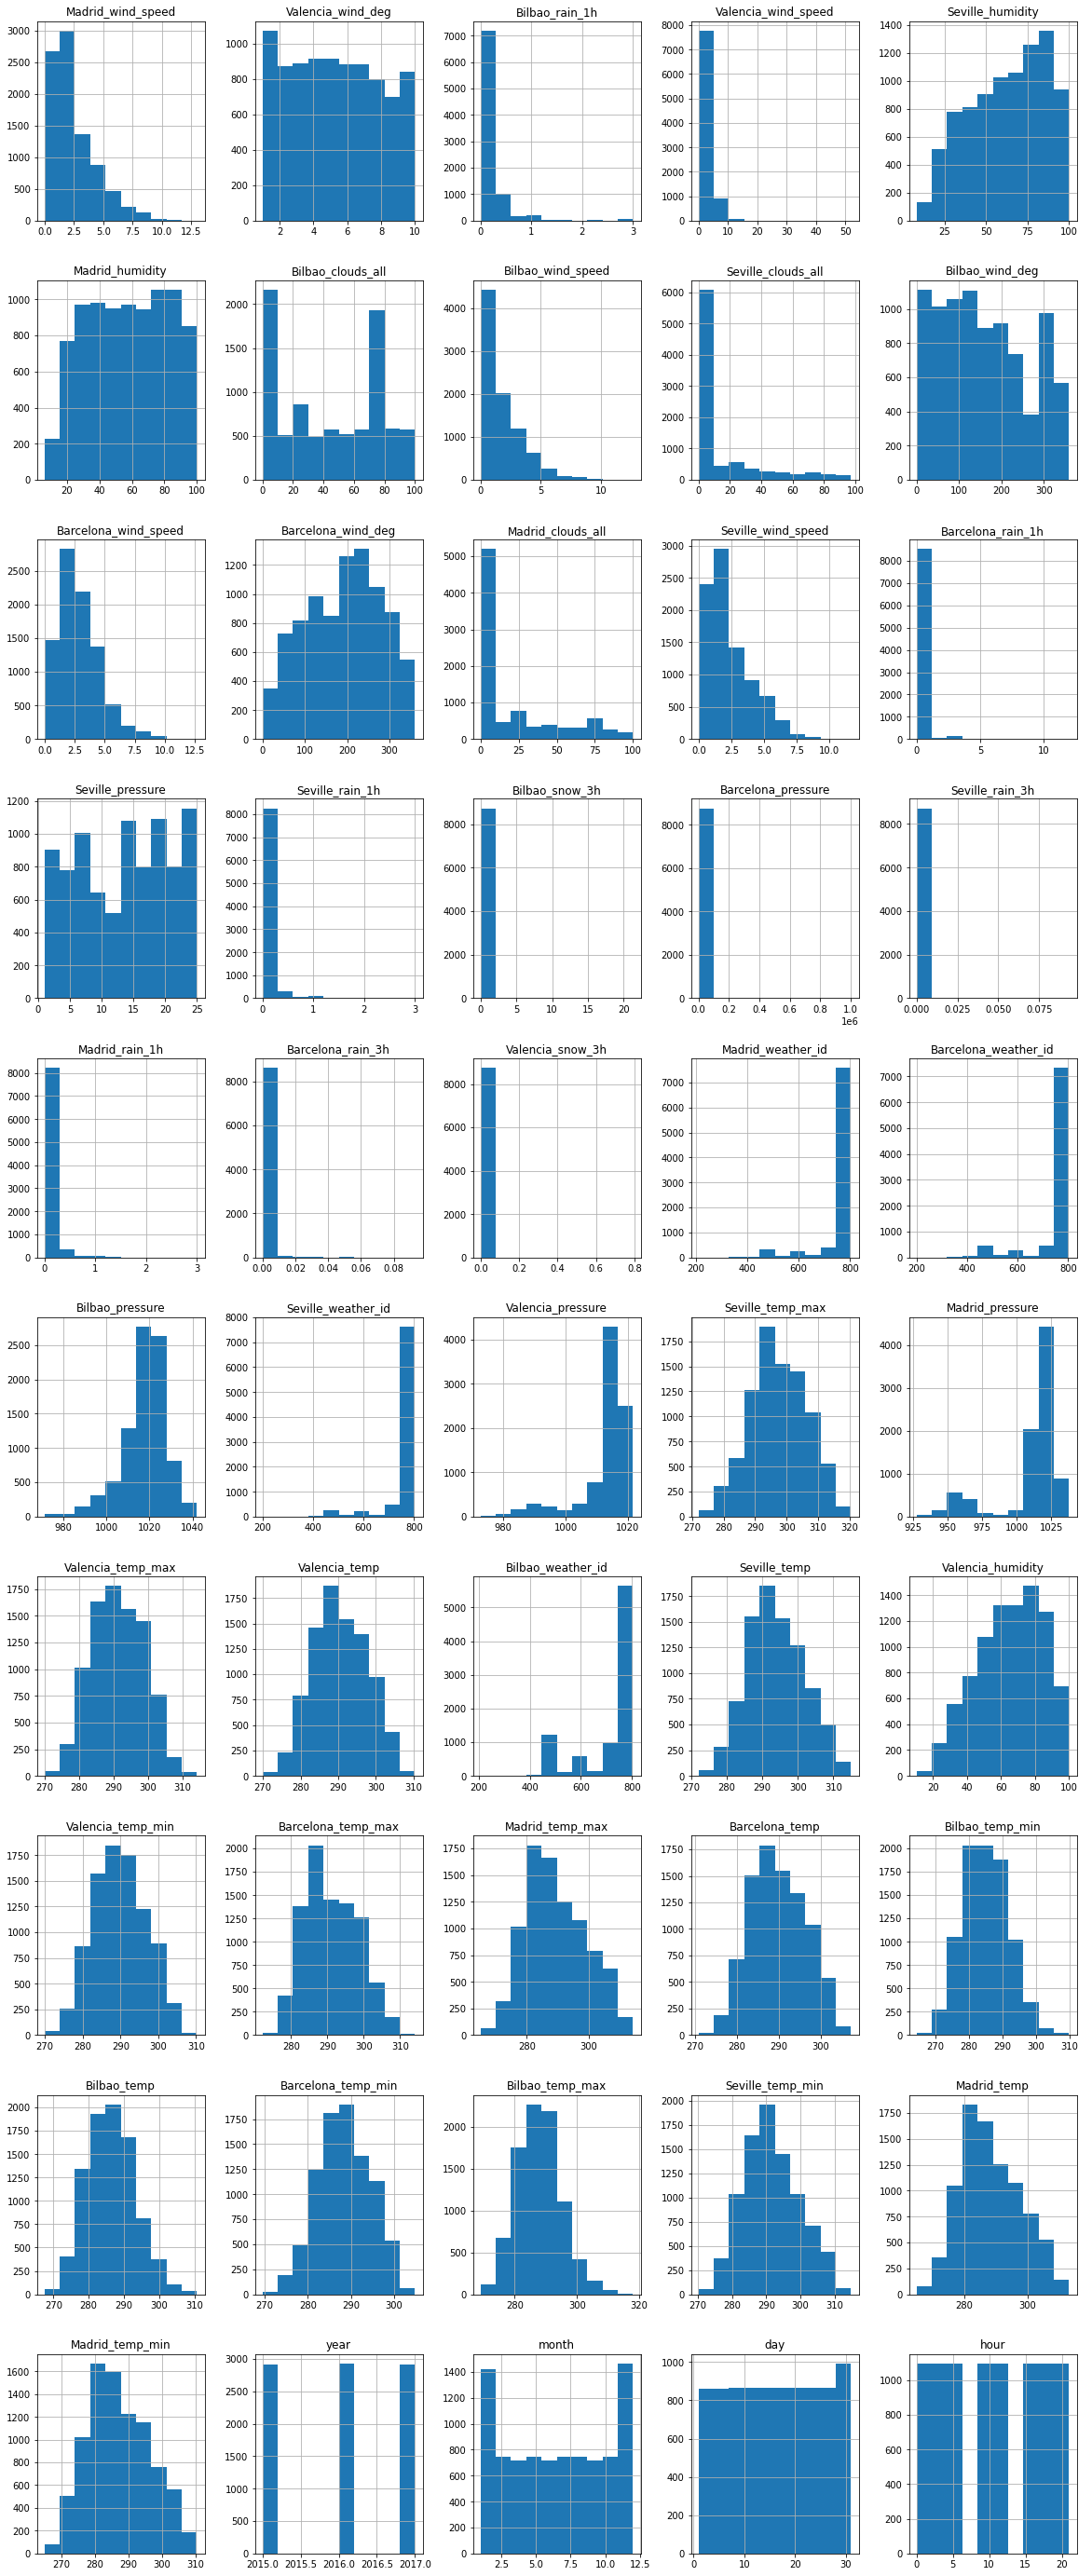

In [41]:
# have a look at feature distributions using Histogram plotting (predictors)
fig, ax = plt.subplots(10, 5, figsize=(20, 50))
X.hist(ax=ax);

##### Most of the variables are skewed, it is expected since all this weather parameters varys with the season 
- Only Temperature and humidty associated parameters are not affected

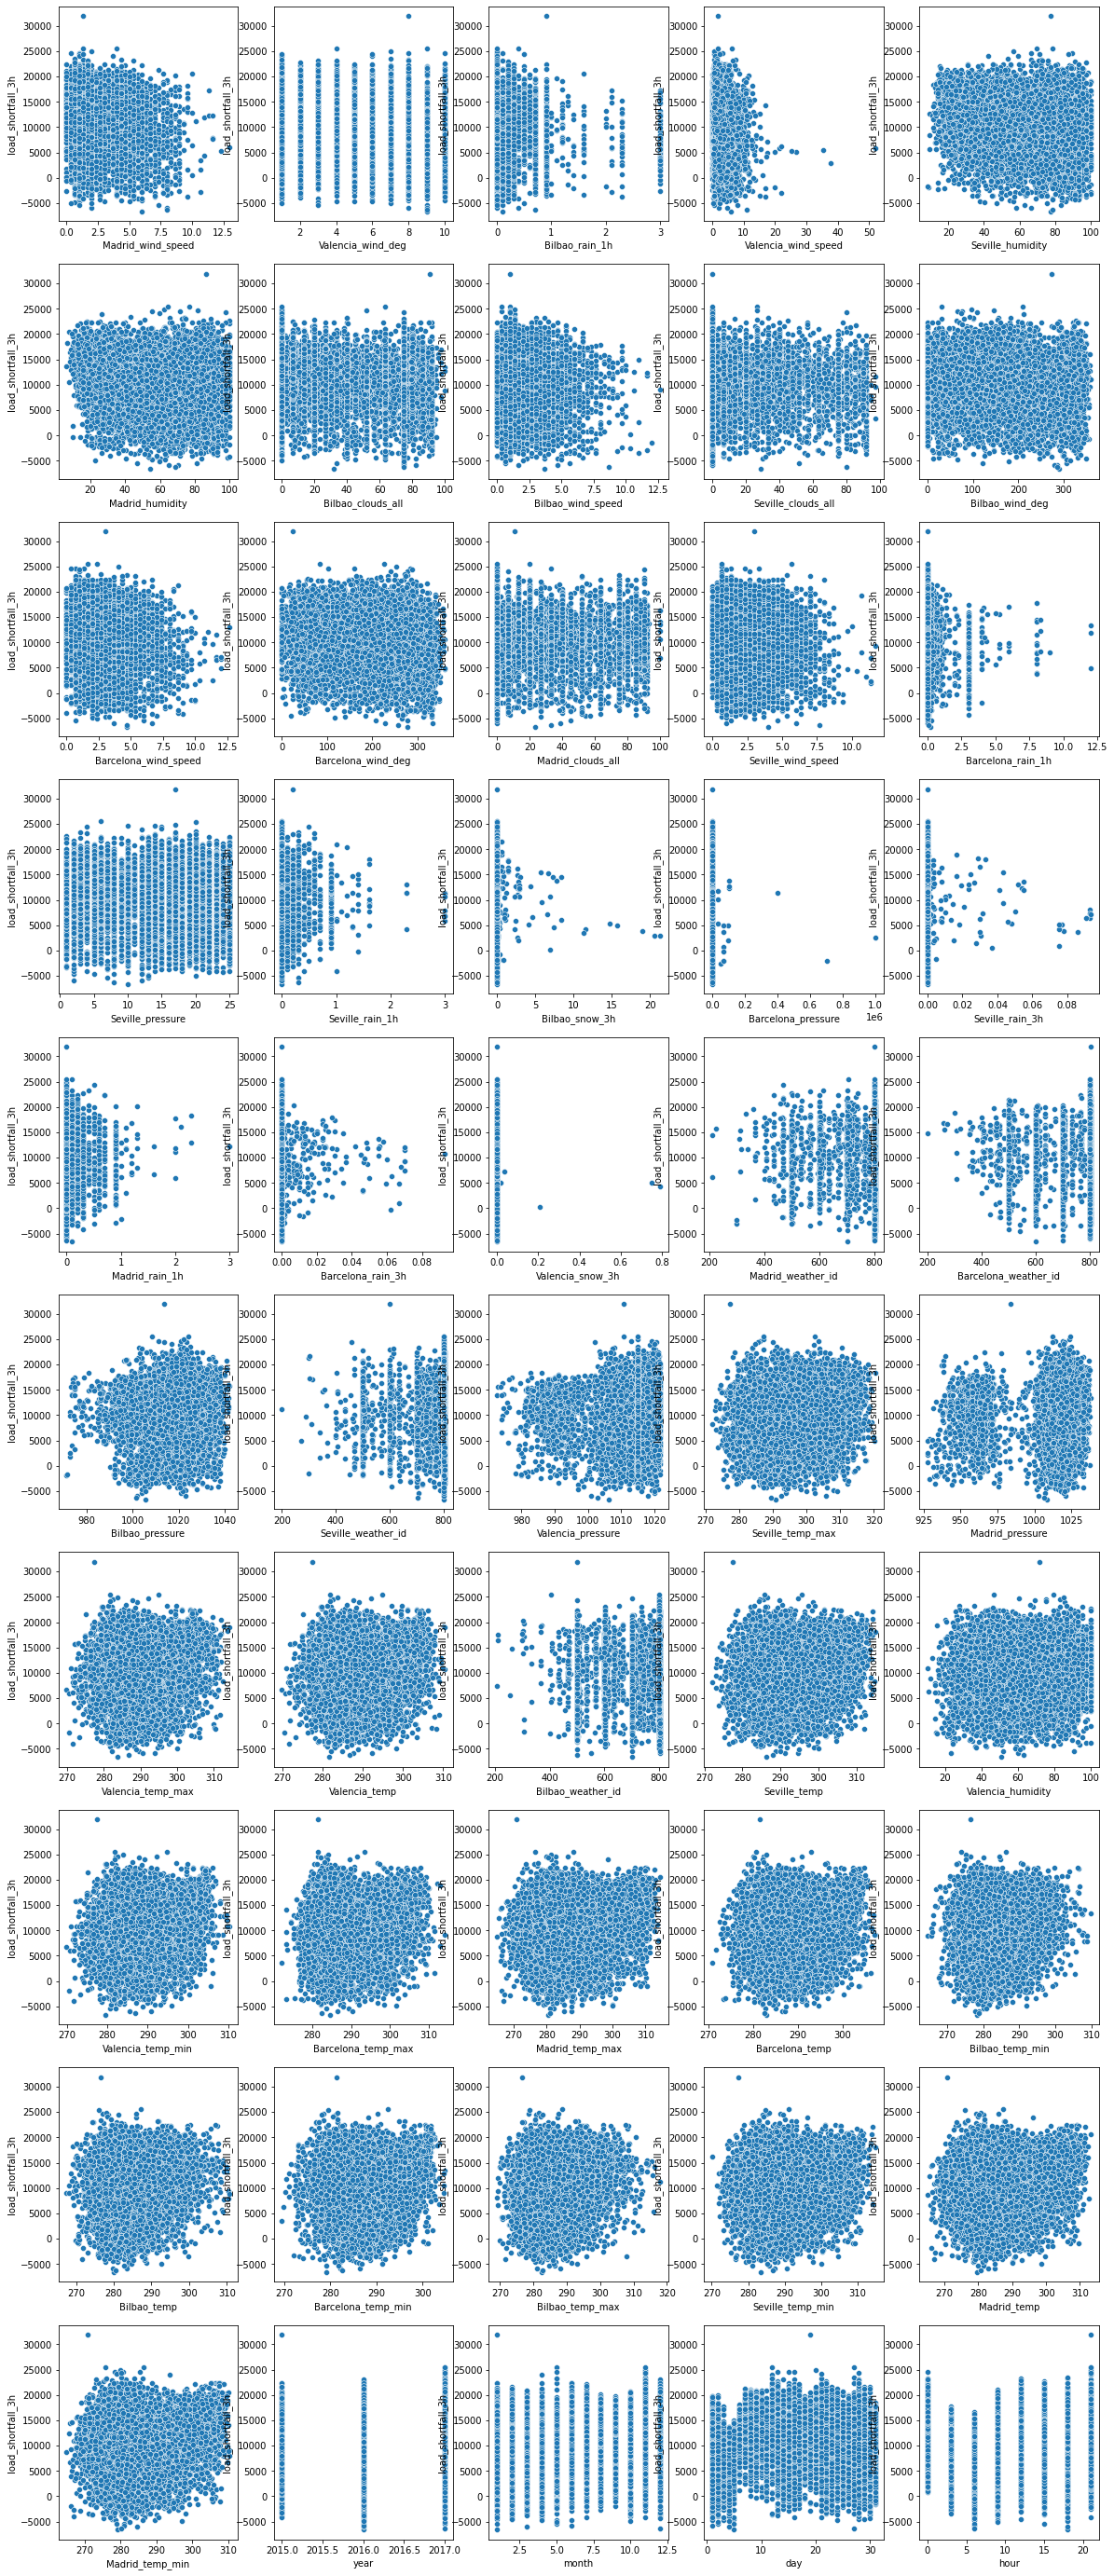

In [42]:
# checking for linearity
fig, ax = plt.subplots(10, 5, figsize=(20,50))
ax = ax.ravel()
for x, column in enumerate(X.columns):
    sns.scatterplot(x=X[column], y=y['load_shortfall_3h'], ax=ax[x])

Apart from the time feautures the whole variable seems non-linear with our target variable

###### Checking for Multicollinearity
- Checking correlation of the independent variable against each other

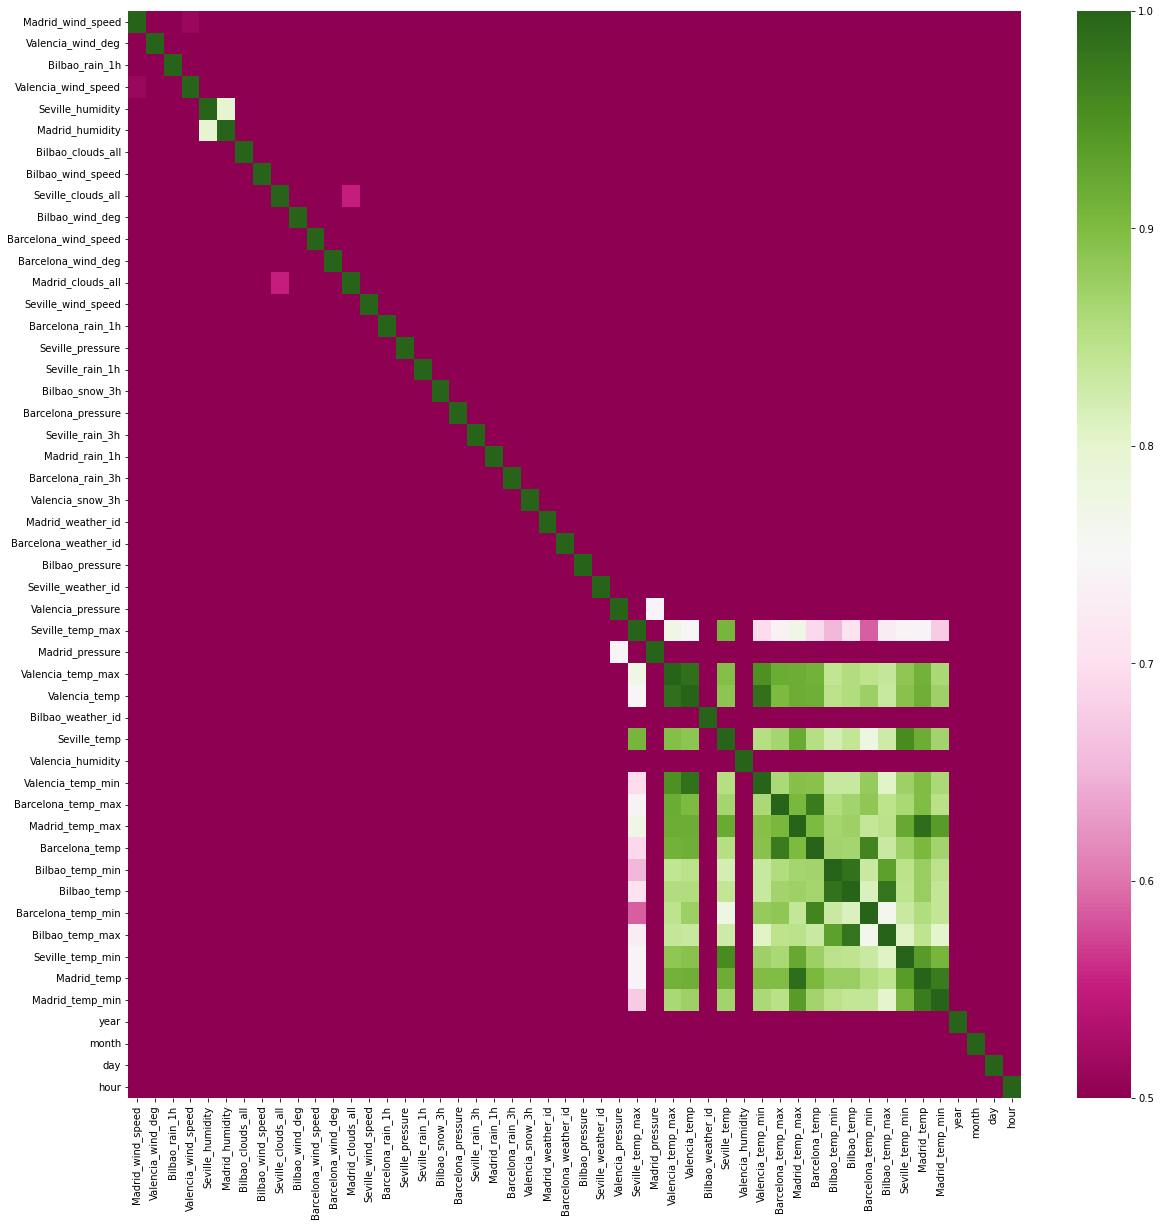

In [43]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), vmin=0.5, vmax=1, cmap="PiYG");

It is clear from, the correllation heat map, that there are few of our predictors that will be bad for modelling considering there correllation with each other (Multicollinearity)
- Seville_humidity and Madrid_humidity is highly correlated, this may indicate that Seville and Madrid exprience same weather codition
- All location temperature (_temp, temp_max and temp_min) associated vairable are (all) highly correlated, which may seems that temperature variables are similar in spain across all location and may also be redundanct to our model; 
    - we may need to drop most of the temperature columns and leave only the best to represent each parameter aformentioned
- Madrid and Seville (_clouds_all) are also correlated; one could be droped to avoid Multicollinearity
- Madrid pressure and Valencia pressure are also correlated

We may need to drop varaible across humidity, temperature and pressure and leave associate variables of highest significance respectively

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### Variable selection/ Removed through Correlation and Significance

In [44]:
# Correlation with the target variable
X_y_train = pd.concat([X, y], axis=1)

In [45]:
# Calculate correlations between predictor variables and the response variable
corrs = X_y_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
month                   0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
hour                    0.139285
year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
day                     0.092116
Valencia_pressure       0.084220
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rai

In [46]:
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

# column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
column_titles = X.columns
for col in column_titles:
    p_val = round(pearsonr(X[col], y['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
corr_Pvalue = df_cp_sorted[df_cp_sorted['P_Value']<0.05]
corr_Pvalue

,Correlation_Coefficient,P_Value
Madrid_wind_speed,-0.150981,0.000000
Valencia_pressure,0.084220,0.000000
Seville_temp_max,0.109834,0.000000
Madrid_pressure,0.092638,0.000000
Valencia_temp_max,0.144270,0.000000
Valencia_temp,0.173225,0.000000
Bilbao_weather_id,0.145875,0.000000
Seville_temp,0.159343,0.000000
Valencia_temp_min,0.201863,0.000000
Barcelona_temp_max,0.164734,0.000000


### It appears all our variable are statistically significant:
- If we were to use a logic test with a significance value of 5% (p-value < 0.05)
- However, we also need to remove the effect of Multicollinearity in the predictor (i.e. those parameter mentioned above) with high correlation with each other.
- We will use the correlation with the target variable to pick the best variable to represent the others, while the others are removed
- This have better correlation with our target and will be used to represent other autocolerated variables in the dataset
    - Temperature minimum: Valencia_temp_min with correlation of 0.201863
    - Temperature: Madrid_temp correlation of 0.186036
    - Temperature Maximum: Madrid_temp_max correlation of 0.182548
    - Humidity: Seville_humidity correlation of -0.167290
    - Pressure: Madrid_pressure correlation of 0.092638

- The others columns will be droped
    - All other temperature variables apart from the ones mention above
    - Madrid_humidity       -0.150536
    - Valencia_pressure       0.084220

### Create new features and drop less useful features

In [47]:
# Creating a function that classify the weather parameters in the dataFrame
def classify_parameters(input_df):
    weather_dict = {}
    for x in input_df.columns:
        finder = x.find('_')
        y = x[finder+1:]
        weather_dict[y] = weather_dict[y] + ',' + x if y in weather_dict else x
    return weather_dict

In [48]:
#getting the weather parameters dictionary
weath_param = classify_parameters(X)
weath_param

{'wind_speed': 'Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed',
 'wind_deg': 'Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg',
 'rain_1h': 'Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h',
 'humidity': 'Seville_humidity,Madrid_humidity,Valencia_humidity',
 'clouds_all': 'Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all',
 'pressure': 'Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure',
 'snow_3h': 'Bilbao_snow_3h,Valencia_snow_3h',
 'rain_3h': 'Seville_rain_3h,Barcelona_rain_3h',
 'weather_id': 'Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id',
 'temp_max': 'Seville_temp_max,Valencia_temp_max,Barcelona_temp_max,Madrid_temp_max,Bilbao_temp_max',
 'temp': 'Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp',
 'temp_min': 'Valencia_temp_min,Bilbao_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min',
 'year': 'year',
 'month

In [49]:
# getting name of all temperature variables alike
temp_max, temp, temp_min  = weath_param['temp_max'].split(','), weath_param['temp'].split(','),\
                            weath_param['temp_min'].split(',')
# temp_merge = [temp_max, temp, temp_min]
temp_list = temp_max + temp + temp_min
# temp_list

In [50]:
# Indentifying column to drop from our dataset
usable_high_corr = ['Valencia_temp_min', 'Madrid_temp', 'Madrid_temp_max']
drop_coln_list = [x for x in temp_list if x not in usable_high_corr]
# Adding humidity and pressure columns to be droped
final_drop_list = drop_coln_list + ['Madrid_humidity', 'Valencia_pressure']

In [51]:
# we will be dropping for both the train and the test dataset
X_mod = X.drop(final_drop_list, axis=1)
X_test_mod = X_test.drop(final_drop_list, axis=1)

### Engineer existing features
- Since all weather parameters (alike) exhibit the same characteristic, espicially looking at there distribution as seen in the histogram above
    - Weather parameters in the dataset: 'wind_speed', 'wind_deg', 'rain_1h', 'humidity', 'clouds_all', 'pressure', 'snow_3h', 'rain_3h', 'weather_id'
- We propose grouping the data together in other to have a leaner dataset & easy to understand there relationship with the target

In [52]:
# Creating a function that combines the various location by the classify weather parameters
# Combination is done by using there mean value
def impute(input_df, weather_dict):
    input_df = input_df.copy()
    dicting = {}
    for x, y in weather_dict.items():
        coln = y.split(',')
        temp_list = []
        if len(coln) < 2:
            continue
        for index in input_df.index:
            temp_list.append(input_df.loc[index, coln].mean())

        dicting[x] = temp_list
    for key in dicting.keys():
        input_df[key] = dicting[key]
    for x, y in weather_dict.items():
        coln = y.split(',')
        if len(coln) < 2:
            continue
        input_df = input_df.drop(coln, axis=1)
    return input_df

In [53]:
# variable combination for both the test and the train dataset 
weath_param_new = classify_parameters(X_test_mod)
X_mod1 = impute(X_mod, weath_param_new)
X_test_mod1 = impute(X_test_mod, weath_param_new)

In [54]:
# Overview of the new dataset
X_mod1.head()

,Valencia_temp_min,Madrid_temp_max,Madrid_temp,year,month,day,hour,wind_speed,wind_deg,rain_1h,humidity,clouds_all,pressure,snow_3h,rain_3h,weather_id
0,269.888000,265.938000,265.938000,2015,1,1,3,2.400000,90.333333,0.0,75.000000,0.000000,766.916667,0.0,0.0,800.0
1,271.728333,266.386667,266.386667,2015,1,1,6,2.066667,123.333333,0.0,74.666667,0.000000,767.666667,0.0,0.0,800.0
2,278.008667,272.708667,272.708667,2015,1,1,9,1.533333,183.111111,0.0,68.500000,0.000000,768.250000,0.0,0.0,800.0
3,284.899552,281.895219,281.895219,2015,1,1,12,1.866667,160.222222,0.0,59.666667,0.000000,773.166667,0.0,0.0,800.0
4,283.015115,280.678437,280.678437,2015,1,1,15,1.933333,150.666667,0.0,58.666667,0.666667,782.666667,0.0,0.0,800.0


In [55]:
kurtosis_df = X_mod1.kurtosis().sort_values(ascending=False)
kurtosis_df

pressure             3688.287268
snow_3h               799.972093
rain_3h               173.988275
rain_1h                44.305171
wind_speed              3.708942
weather_id              3.633779
clouds_all              0.228047
Valencia_temp_min      -0.599551
Madrid_temp            -0.612299
wind_deg               -0.640928
Madrid_temp_max        -0.662861
humidity               -0.823110
day                    -1.193873
month                  -1.207760
hour                   -1.237868
year                   -1.498369
dtype: float64

In [56]:
skew_df = X_mod1.skew().sort_values(ascending=False)
skew_df

pressure             57.986880
snow_3h              26.134556
rain_3h              12.219758
rain_1h               5.445029
wind_speed            1.503385
clouds_all            0.731729
Madrid_temp           0.304123
Madrid_temp_max       0.298707
Valencia_temp_min     0.081832
day                   0.005984
hour                  0.000719
year                 -0.001048
month                -0.009544
wind_deg             -0.097711
humidity             -0.247838
weather_id           -1.752215
dtype: float64

#### We have been able to reduce both outliers and skewness of our variable and also there magnitude

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### Spliting the train dataset

In [57]:
# Spliting the dataset back to test and train after general cleaning of the data set
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X_mod1, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [58]:
# Creating a function that check metrics
def metrics_fn(y, predict):
    mae = round(metrics.mean_absolute_error(y, predict), 2)
    mse = round(metrics.mean_squared_error(y, predict), 2)
    r2 = round(metrics.r2_score(y, predict), 4)
    return mae, mse, r2

## Creating different regression models

#### 1. Linear Regression Model

In [59]:
# Function for creating Linear Regression
def score_dataset_lr(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met

In [60]:
print("METRICS for Linear Regression")
linear_model = score_dataset_lr(X_train, X_valid, y_train, y_valid)
linear_result = pd.DataFrame(linear_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
linear_result

METRICS for Linear Regression


,MAE,MSE,R2
Training,3847.96,23454065.88,0.1353
Validation,3897.69,23741977.62,0.1398


###### Standardizing for 'lasso' and 'ridge' regression

In [61]:
# Create standardization object
scaler = StandardScaler()

# Scaling for both train and test dataset
X_scaled = scaler.fit_transform(X_mod1)
X_test_scaled = scaler.fit_transform(X_test_mod1)

# Divide data into training and validation subsets
X_train_sc, X_valid_sc, y_train_sc, y_valid_sc = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

#### 2. Ridge Regression Model

In [62]:
# Function for creating Ridge Regression
def score_dataset_rid(X_train, X_valid, y_train, y_valid):
    model = Ridge()
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met

In [63]:
print("METRICS for Ridge Regression")
ridge_model = score_dataset_rid(X_train_sc, X_valid_sc, y_train_sc, y_valid_sc)
ridge_result = pd.DataFrame(ridge_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
ridge_result

METRICS for Ridge Regression


,MAE,MSE,R2
Training,3847.95,23454069.93,0.1353
Validation,3897.71,23742717.48,0.1398


#### 3. Lasso Regression Model

In [64]:
# Function for creating Ridge Regression
def score_dataset_lass(X_train, X_valid, y_train, y_valid):
    model = Lasso()
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met

In [65]:
print("METRICS for Lasso Regression")
lasso_model = score_dataset_lass(X_train_sc, X_valid_sc, y_train_sc, y_valid_sc)
lasso_result = pd.DataFrame(lasso_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
lasso_result

METRICS for Lasso Regression


,MAE,MSE,R2
Training,3847.90,23454278.99,0.1353
Validation,3897.95,23747318.88,0.1396


#### 4. XGBRegressor Model

In [66]:
# Function for creating XGBRegressor
def score_dataset_xgb(X_train, X_valid, y_train, y_valid):
    model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate = 0.06)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met

In [67]:
print("METRICS for XGB Regressor")
xgb_model = score_dataset_xgb(X_train, X_valid, y_train, y_valid)
xgb_result = pd.DataFrame(xgb_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
xgb_result

METRICS for XGB Regressor


,MAE,MSE,R2
Training,2364.31,8823855.85,0.6747
Validation,2617.65,10625256.17,0.6150


####  5. RandomForestRegressor Model

In [68]:
# Function for creating RandomForestRegressor
def score_dataset_rfg(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train.values.ravel())
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met

In [69]:
print("METRICS for Random Forest Regressor")
rfg_model = score_dataset_rfg(X_train, X_valid, y_train, y_valid)
rfg_result = pd.DataFrame(rfg_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
rfg_result

METRICS for Random Forest Regressor


,MAE,MSE,R2
Training,908.91,1382987.27,0.9490
Validation,2377.24,9236855.05,0.6653


#### 6. DecisionTreeRegressor Model

In [70]:
# Function for creating DecisionTreeRegressor
def score_dataset_dtr(X_train, X_valid, y_train, y_valid):
    model = DecisionTreeRegressor(max_depth=9, random_state=0, max_leaf_nodes=500)
    model.fit(X_train, y_train.values.ravel())
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met

In [71]:
print("METRICS for Decision Tree Regressor")
dtr_model = score_dataset_dtr(X_train, X_valid, y_train, y_valid)
dtr_result = pd.DataFrame(dtr_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
dtr_result

METRICS for Decision Tree Regressor


,MAE,MSE,R2
Training,2333.97,9303612.10,0.6570
Validation,2917.69,13846825.35,0.4983


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [72]:
# Compare model performance

In [73]:
# Choose best model and motivate why it is the best choice

In [74]:
# Fill in the line below: get test predictions
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate = 0.06)
model.fit(X_train, y_train.values.ravel())
preds_test = model.predict(X_test_mod1)

In [75]:
# Save test predictions to file
output = pd.DataFrame({'time': df_test.time,
                       'load_shortfall_3h': preds_test})
output.to_csv('submission.csv', index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [76]:
# discuss chosen methods logic